In [8]:
import numpy as np

In [9]:
import tensorflow as tf

In [10]:
from tensorflow.keras import models,layers

In [11]:
import matplotlib.pyplot as plt

In [12]:
image_size = 256
batch_size =32
epochs =95

In [13]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Train",
    image_size = (image_size,image_size),
    shuffle =True,
    batch_size = batch_size
)

Found 15388 files belonging to 41 classes.


In [14]:
class_names = dataset.class_names
class_names

41

In [15]:
len(dataset)

481

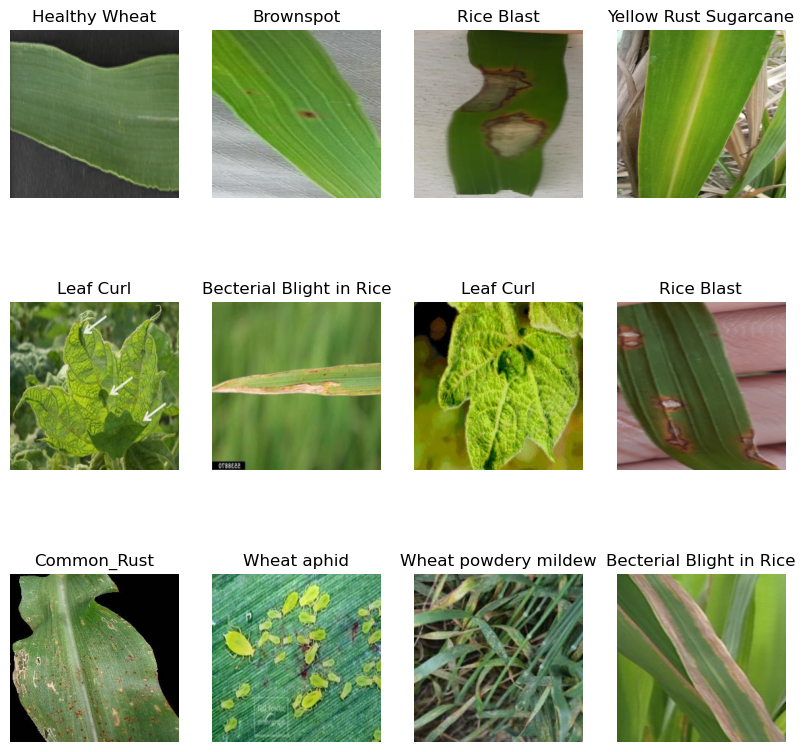

In [16]:
plt.figure(figsize=(10,10))
for image_batch, lable_batch in dataset.take(1):
    for i in range(12):
        axis = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[lable_batch[i]])
        plt.axis("off")

In [17]:
len(dataset)

481

In [18]:
#80% => train
#20% => 10% - test , 10% - validate

In [19]:
def dataset_partitions_tf(ds,train_split=0.8,test_split=0.1,valid_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)

    train_size = int(ds_size*train_split)
    valid_size = int(ds_size*valid_split)

    train_ds = ds.take(train_size)
    test_ds = ds.skip(train_size).take(valid_size)
    valid_ds = ds.skip(train_size).skip(valid_size)
    return train_ds,test_ds,valid_ds

In [20]:
train_ds,test_ds,valid_ds = dataset_partitions_tf(dataset)

In [21]:
len(train_ds)

384

In [22]:
len(test_ds)

48

In [23]:
len(valid_ds)

49

In [24]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [25]:
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [26]:
valid_ds = valid_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [27]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(image_size,image_size),
    layers.Rescaling(1.0/255)
])

In [28]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [29]:
input_shape = (image_size,image_size,batch_size,3)
n_classes = len(class_names)

In [30]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(n_classes,activation = "softmax")
])

In [31]:
model.build(input_shape = input_shape)

In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (256, 256, 256, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (256, 256, 256, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (256, 254, 254, 32)    │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (256, 127, 127, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (256, 125, 125, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (256, 62, 62, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (256, 60, 60, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (256, 30, 30, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (256, 57600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (256, 64)              │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (256, 41)              │         2,665 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,745,449 (14.29 MB)

 Trainable params: 3,745,449 (14.29 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(
    optimizer ="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs = epochs,
    batch_size = batch_size,
    verbose =1,
    validation_data = valid_ds
)

Epoch 1/95
346/384 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.2926 - loss: 2.7506 

In [ ]:
scores = model.evaluate(test_ds)

In [ ]:
model_version = 100
model.export(f"../models/{model_version}")